
# Life Expectancy Predictions



The purpose and motivation of our tutorial is to provide a concise set of instructions, through data science, that accesses, manipulates, and analyzes real data. In the case of our tutorial we will be utilizing global life expectancy data. Using this dataset, from a humanitarian standpoint, is a good way to measure global health and welfare levels. While, on the other hand the dataset is deep and interesting, from a data science perspective.


# Background and Objective


Our dataset, as mentioned earlier, features data on global life expectancy (in years) and was obtained from: https://ourworldindata.org/life-expectancy. Our data set features around 14,000 different entities (country by year). Each entity is accompanied by attributes such as country code, year, and life expectancy. The most important aspect of our dataset, on which we will focus on most, is life expectancy.
 
Using our dataset our tutorial will:
 
 
1.   Determine the impact that time progression and location have on the life expectancy of a country. This will be supported by visuals such as graphs of the dataset.
2.  Utilize hypothesis testing in order to confirm the results found in part 1.


## Data Collection
The first step, in order to perform any sort of action on a dataset, is to obtain the dataset itself. There are two methods to accomplishing this as data can either be obtained from:

1.   Direct download from an online source
2.   Reading already downloaded data from an input file within your computer

In our tutorial we will be downloading our dataset online. To begin you must always start by importing the right packages and libraries, in this case we begin with the pandas library.



In [0]:
import pandas as pd

Our dataset, from: https://ourworldindata.org/life-expectancy , is stored into a dataframe using the read csv command from the pandas library. The dataset contains recorded life expectancies for each country from as early as 1755 to present. Some of this is seen as we display the data below.

In [0]:
df = pd.read_csv('life-expectancy.csv')
df.head()

,Entity,Code,Year,Life expectancy (years)
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


##Data Processing
Most countries only started recording data after 1950. It is important to locate and handle such discrepancies as they may alter analysis results or cause errors within code. Due to this, in order to account for the differences in data, we chose to only use data from 1950 to present. We do this by manipulating the dataframe to filter out any data before 1950.


In [0]:
# drop all rows that contain data for years before 1950
df = df[df.Year >= 1950]
df.rename(columns={"Life expectancy (years)": "LifeExpectancy"}, inplace=True)
df.head()

,Entity,Code,Year,LifeExpectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


While the dataset in itself includes each country alongside its corresponding country code, it does account for the continent that each country is located within. Through the use of an additional dataset we are able to use the country column in order to create a column indicating the continent each country entity is located within.

In [0]:
continents = pd.read_csv('continents.csv')
continents.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
continents.drop(columns=['alpha-2', 'country-code', 'iso_3166-2', 'intermediate-region', 
                         'region-code', 'sub-region-code', 'intermediate-region-code'], inplace = True)
continents.rename(columns={"alpha-3": "country-code"}, inplace=True)
continents.set_index('country-code', inplace=True)
continents.head()

,name,region,sub-region
country-code,,,
AFG,Afghanistan,Asia,Southern Asia
ALA,Åland Islands,Europe,Northern Europe
ALB,Albania,Europe,Southern Europe
DZA,Algeria,Africa,Northern Africa
ASM,American Samoa,Oceania,Polynesia


In [0]:
cont = []

for i, row in df.iterrows():
  if [row['Code']] in continents.index.values:
    cont.append(continents.loc[row['Code']]['region'])
  else:
    cont.append("None")

df.insert(4, "Continent", cont)

df.head()

,Entity,Code,Year,LifeExpectancy,Continent
0,Afghanistan,AFG,1950,27.638,Asia
1,Afghanistan,AFG,1951,27.878,Asia
2,Afghanistan,AFG,1952,28.361,Asia
3,Afghanistan,AFG,1953,28.852,Asia
4,Afghanistan,AFG,1954,29.350,Asia


Some entries in the life expectancy dataset contain information for continents or regions. We choose to ignore those entries. 

In [0]:
df = df[df.Continent != "None"]
df.head()

,Entity,Code,Year,LifeExpectancy,Continent
0,Afghanistan,AFG,1950,27.638,Asia
1,Afghanistan,AFG,1951,27.878,Asia
2,Afghanistan,AFG,1952,28.361,Asia
3,Afghanistan,AFG,1953,28.852,Asia
4,Afghanistan,AFG,1954,29.350,Asia


We choose to view the data every 5 years, starting in 1950.

In [0]:
df = df[df.Year % 5 == 0]
df.reset_index(inplace=True, drop=True)
df.head()

,Entity,Code,Year,LifeExpectancy,Continent
0,Afghanistan,AFG,1950,27.638,Asia
1,Afghanistan,AFG,1955,29.854,Asia
2,Afghanistan,AFG,1960,32.446,Asia
3,Afghanistan,AFG,1965,34.948,Asia
4,Afghanistan,AFG,1970,37.409,Asia


## Exploratory Data Analysis

Similar to the first step of data collection we must import the necessary libraries and packages in order to analyze our data. In this case of our tutorial we will import...

In [0]:
# library imports
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sb
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Life Expectancy per Country  vs. Year:**

For our first comparison, we will compare and determine the relationship between the life expectancy of a country and year. We will start this by plotting a graph comparing these two factors setting the year as the independent variable and life expectancy per country (with labels for each point set to corresponding country) as our dependent variables. It is important to graph data when searching for relationships as it provides a visual aid to find correlations and trends. This is done through the boxplot and scatter commands.

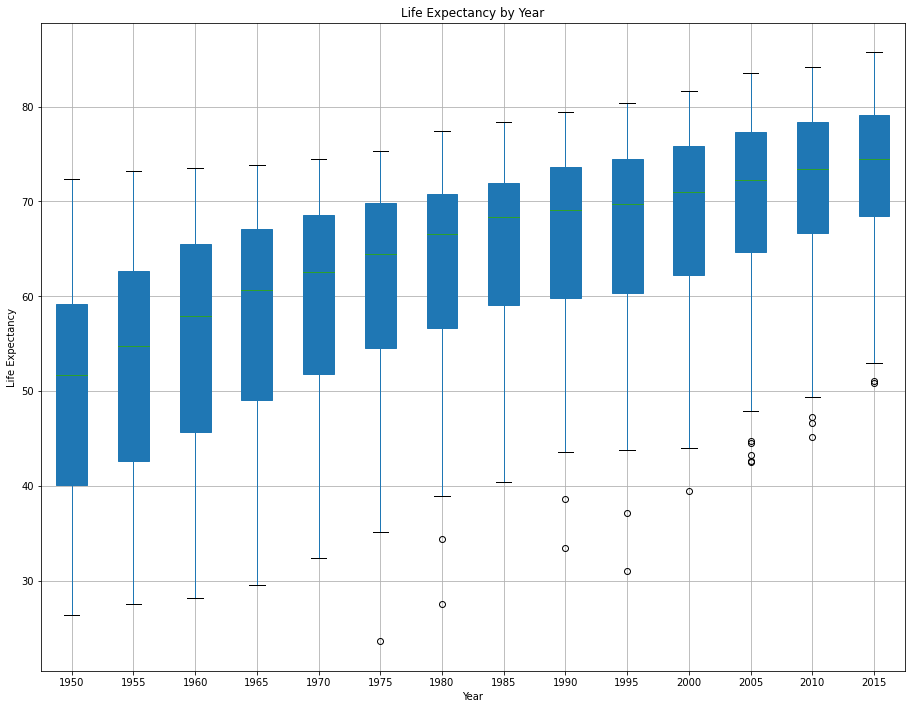

In [0]:
bp = df.boxplot(figsize=(15,12),column='LifeExpectancy', by='Year', patch_artist=True)
bp.get_figure().suptitle("")
plt.title('Life Expectancy by Year')
plt.xlabel('Year');
plt.ylabel('Life Expectancy');

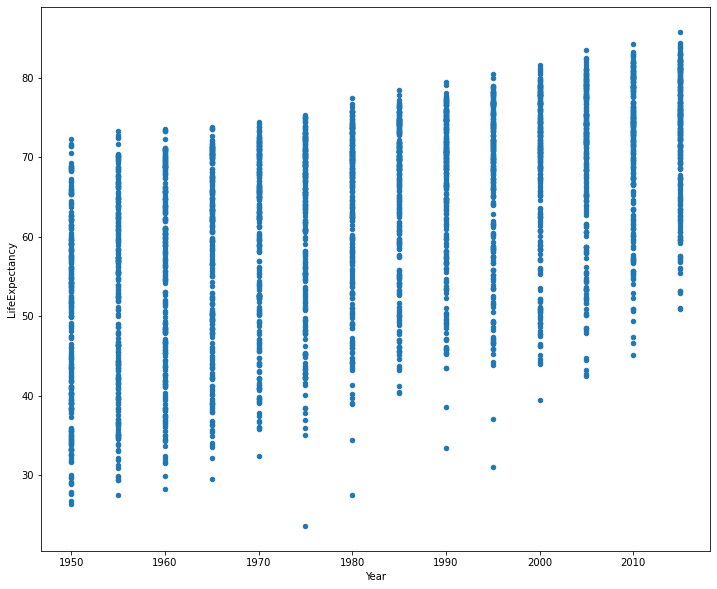

In [0]:
df.plot.scatter(x='Year', y='LifeExpectancy',figsize=(12,10))
plt.show()

Next we will perform a regression in order to determine the relationship between the year and life expectancy per country. A regression analysis performs a calculation that provides a linear function evaluating the correlation between variables of a dataset. We will do this with the OLS command.

In [0]:
# regression on life expectancy based on year
reg = sm.ols('LifeExpectancy~Year', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1371.
Date:                Mon, 18 May 2020   Prob (F-statistic):          6.97e-251
Time:                        21:58:06   Log-Likelihood:                -12246.
No. Observations:                3262   AIC:                         2.450e+04
Df Residuals:                    3260   BIC:                         2.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -596.2647     17.797    -33.504      0.000    -631.159    -561.370
Year           0.3324      0.009     37.032      0.000       0.315       0.350
==============================================================================
Omnibus:                      246.183   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.075
Skew:                          -0.616   Prob(JB):                     1.65e-53
Kurtosis:                       2.478   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Last but not least we will plot this regression line on our original plot between life expectancy and year in order to provide a visual representation of the correlation.

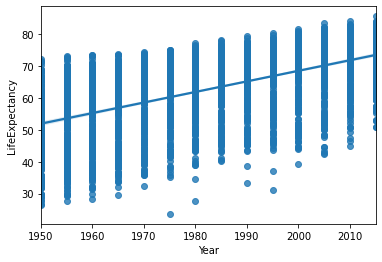

In [0]:
# plot regression line over avg overall life expectancy over time
sb.regplot(x='Year', y='LifeExpectancy', data=df)
plt.show()

**Life Expectancy per Country vs. Continent:**

After plotting the first relationship between country life expectancy and year, we determined that there are more factors at play in order to determine the life expectancy of a country other than the year itself. For this we can use the countinent column we made earlier. We begin by plotting a graph where the independent variable is set to continent and the dependendent variable is set to life expectancy (average value per continent).





In [0]:
d = {'LifeExpectancy': ['mean']}
current_df = df.groupby(['Continent']).agg(d)
current_df.head()

,LifeExpectancy
,mean
Continent,
Africa,51.147518
Americas,67.327647
Asia,61.927112
Europe,72.174334
Oceania,63.976606


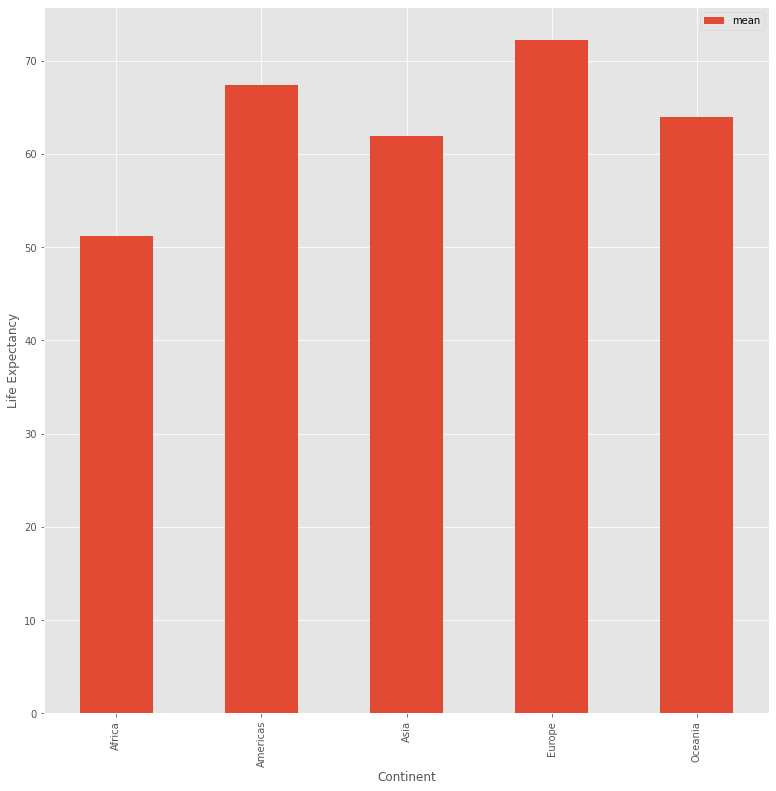

In [0]:
# display life expectancy vs continents
plt.style.use('ggplot')
current_df.plot(y='LifeExpectancy', kind='bar', figsize=(13,13))
plt.xlabel('Continent');
plt.ylabel('Life Expectancy');

**Life Expectancy per Country vs Continent and Year:**

Graphing the relationship between continent and life expectancy it is apparent that year attribute was not included. This is important as when evaluating any attribute value of an entity, all other relevant attributes should be accounted for when conducting regression analysis in order to ensure accuracy. In our example, we will reconduct the regression on the life expectancy of a country, however this time we will account for both continent and year. 




In [0]:
d = {'LifeExpectancy': ['mean']}
avg_df = df.groupby(['Year', 'Continent']).agg(d)
avg_df.columns = avg_df.columns.droplevel()
avg_df.rename(columns={"mean": "LifeExpectancy"}, inplace=True)
avg_df.reset_index(inplace=True)
avg_df.head()

,Year,Continent,LifeExpectancy
0,1950,Africa,38.192172
1,1950,Americas,54.321444
2,1950,Asia,46.280059
3,1950,Europe,63.004766
4,1950,Oceania,51.724870


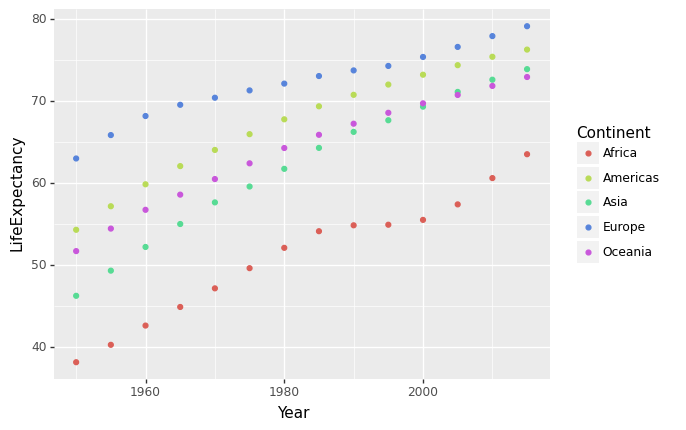

<ggplot: (-9223363283336457896)>

In [0]:
(ggplot(avg_df, aes(x='Year', y='LifeExpectancy', color='Continent')) + geom_point())

In [0]:
# regression on life expectancy based on continent and year
reg = sm.ols('LifeExpectancy~Year*Continent', data=avg_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     591.8
Date:                Mon, 18 May 2020   Prob (F-statistic):           4.00e-55
Time:                        21:58:20   Log-Likelihood:                -101.58
No. Observations:                  70   AIC:                             223.2
Df Residuals:                      60   BIC:                             245.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -660.0658     29.323    -22.510      0.000    -718.721    -601.411
Continent[T.Americas]         74.0115     41.469      1.785      0.079      -8.939     156.962
Continent[T.Asia]           -112.1449     41.469     -2.704      0.009    -195.095     -29.194
Continent[T.Europe]          308.6179     41.469      7.442      0.000     225.667     391.568
Continent[T.Oceania]          90.5814     41.469      2.184      0.033       7.631     173.532
Year                           0.3587      0.015     24.256      0.000       0.329       0.388
Year:Continent[T.Americas]    -0.0292      0.021     -1.395      0.168      -0.071       0.013
Year:Continent[T.Asia]         0.0620      0.021      2.964      0.004       0.020       0.104
Year:Continent[T.Europe]      -0.1451      0.021     -6.935      0.000      -0.187      -0.103
Year:Continent[T.Oceania]     -0.0392      0.021     -1.875      0.066      -0.081       0.003
==============================================================================
Omnibus:                        3.554   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                3.154
Skew:                          -0.431   Prob(JB):                        0.207
Kurtosis:                       2.417   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Last but not least, we will again provide a visual to show the new regression line over our original data plot.

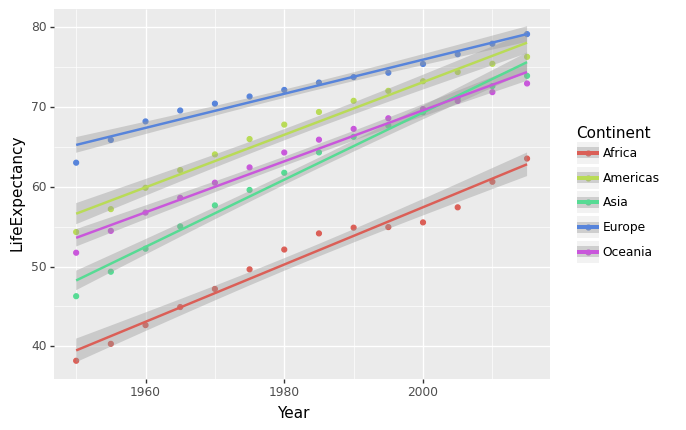

<ggplot: (8753518217143)>

In [0]:
(ggplot(avg_df, aes(x='Year', y='LifeExpectancy', color='Continent')) + geom_point() + geom_smooth(method='lm'))

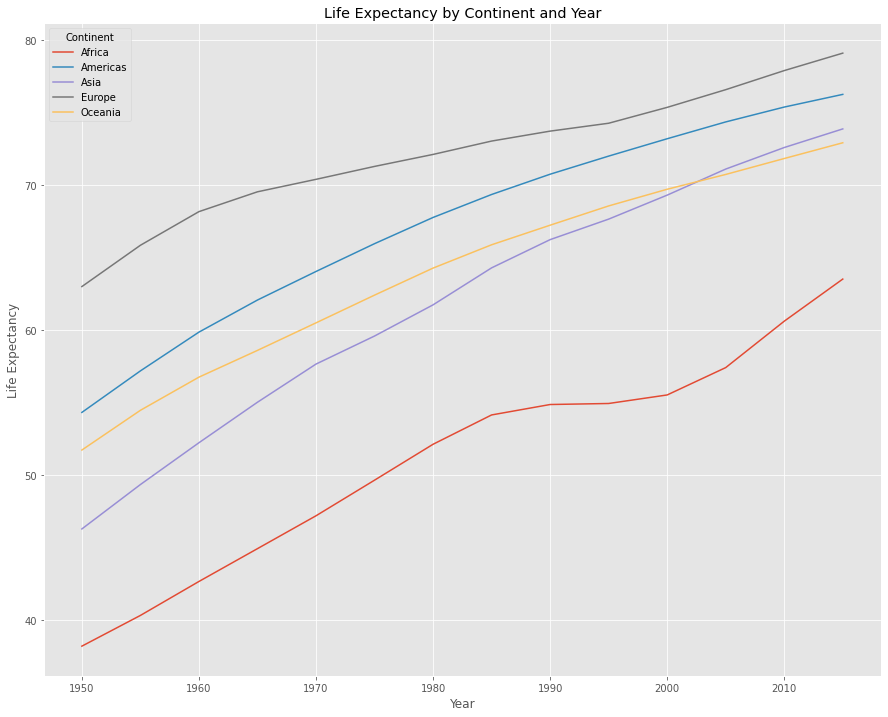

In [0]:
# display scatter plot of current life expectancies (grouped by continent by color)
avg_df = avg_df.pivot(index='Year', columns='Continent', values='LifeExpectancy')
avg_df.plot.line(title='Life Expectancy by Continent and Year', figsize=(15,12))
plt.xlabel('Year');
plt.ylabel('Life Expectancy');

**Data Results:**
 
Initially, when we ran the regression and evaluated the relationship between country life expectancy and years, we were able to observe the basic linear increase of life expectancy as time progressed (with data distributed away from the center of the data). Although, there is a noticeable trend we cannot ensure a direct relationship between these two attributes yet.
 
Moving on we graphed the relationship between continents and average life expectancies. The graph shows a noticeable difference in average life expectancy values per continent. This indicates that there is a dependency on continent location in respect to a country's life expectancy.
 
Acquiring this knowledge we proceed to include both attributes when running a regression on life expectancy. The results gave a linear regression equation with a coefficient assigned to each continent and year, each of these coefficients estimating the exact numerical impact each attribute holds. In order to read the results of the regression we multiply each coefficient by its corresponding value, with some coefficient having more effect than others (apparent in our graphs above). This is explained further in the example below.
 
**Example of Reading Regression Results:**
 
**Use the regression equation to estimate life expectancy of U.S.A in 1972:**
 
* We would first multiply the year value (1972) by the year coefficient 
(.3587) -> Around 707.35
* Next we go through the dummy variables (continent coefficients) since the U.S is located within the Americas continent we will multiply only the Americas coefficient (74.0115) by one, multiplying the rest by zero as we are not dealing with other continents -> 74.0115
* The same is done with year (1972) and America continent year coefficient value (-0.0292) -> Around -57.58
*Finally, the values of all multiplications are added to the intercept value (-660.0658) to get our estimate -> Around 63.717 Years
 
**Takeaway:**
 
Similar to our tutorial example, there are many possible relationships that a dataset may hold. A lot of data science focuses around this fact especially when trying to determine trends within the data. When observing and analyzing any data it is often helpful to visualize the data through graphing it, as most graphs do a better job communicating possible trends as opposed to reading the set as a whole. If one desires to dive a little deeper it is recommended to use the regression tools provided as they provide numerical estimations. It is, however, important to double check if a trend as it may not be plausible (use p-value, more information within hypothesis testing) or be missing other affecting attributes within the regression (as was in our case).



## Hypothesis Testing and Analysis (with Machine Learning)

**Hypothesis Testing:**

When coming up with data analysis it is very important to verify and check your results. This can be done through hypothesis testing with machine learning. In this portion of our tutorial we will use hypothesis testing in order to confirm the results of our tests above. Hypothesis tests are used in order to test an assumption based off a parameter. This is done in four steps:


1.   Creating the null hypothesis
2.   Setting significance level
3.   Computing the probability
4.   Given the value in part 3 reject or accept the null hypothesis

**Null Hypothesis: Life Expectancy vs. Year:** No relationship between year and life expectancy.

* We are able to obtain the p-value and all other necessary data to make a decision when we ran our regression (refer value under p>|t| in the first set of regressions results [life exp vs. year]) 

The p-value (probability value) we obtained from running the regression from year and life expectancy was very small and insignificant (0.0) being less than that of the confidence level (given by the value range on top of the column next to that of p-value). We can determine that the relationship is likely therefore, we **reject** the null hypothesis.

**Null Hypothesis: Life Expectancy vs. Year and Continent:** No relationship between year/continent and life expectancy.

* Similar to the first example we are able to obtain the p-value and all other necessary data to make a decision when we ran our regression (refer values under p>|t| in the second set of regressions results [life exp vs. year/continent]) 

There are many different p-values obtained from running the regression from year/continent and life expectancy (one value for each coefficient). Although the p-values of some coefficients exceed the confidence level a majority including the intercepts have a p-value that is small and insignificant (below confidence level). This indicates that there is a likely relationship between year/continent and country life expectancy therefore we **reject** our null hypothesis.


**Machine Learning (Random Forests and Cross Validation):**

To further confirm our results we will use machine learning. Specifically we will use random forest and cross validation in order to do so. 


*   Random Forest: One of the classifiers for machine learning. This classifier uses multiple decision trees (if and else if predictions) in order to predict values.

* Cross Validation: Method of checking the results from the random forest classifier. Accomplishes by splitting dataset into seperate training and testing sets. The training set is passed through the classifier method. These results are then compared to the testing set which in turn determines the effectiveness of the classifier  

Our test will use these methods in order to calculate an R-squared score. The higher the value the better the fit.
 

In [0]:
# Imported libraries required
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import preprocessing

# Sets the data after translating the data
# (due to continents being strings)
trnsl = preprocessing.LabelEncoder()
df = df.apply(trnsl.fit_transform)
tmpCol = ['Year','Continent']

# Creates the testing (30%) and training (70%) sets
X_train, X_set, y_train, y_set = train_test_split([list(row.values) for _,
                                                     row in df[tmpCol].iterrows()], 
                                                    df['LifeExpectancy'].values) 

# Sets to random forest and sets amount of cross validations 
rndTree = RandomForestClassifier(n_estimators = 10)
prbVal = rndTree.fit(X_train, y_train)
retVal = prbVal.predict(X_set)

# Returns R^2 Value
res = r2_score(y_set, retVal)
res

0.3174719553173907

**Machine Learning Results:**

Due to the random forest method classifier being random, the R-squared score will most likely change often. However, our tests showed that all values were fairly high, indicating that our regression between country life expectancy and year/continent is a good fit on the data. This confirms the results of our tests earlier about the relationship between these values.

## Summary of Results
 
Overall, throughout this tutorial we originally determined that there is a correlation between a country's life expectancy and both, continent and year. This was originally tested through linear regression where we concluded that the coefficient results were valid. This is clearly seen through the graph visuals that were plotted with these regression results (showing a good fit). In addition to this we were able to confirm our results through hypothesis testing, in which we rejected the null hypothesis, confirming a relationship (indicated by the insignificant p-values). Finally, our random forests and cross validation methods (machine learning) provided a final confirmation of our results. 
 
All in all, through this tutorial we were able to use and manipulate data to find, show, and test relationships within our data, some of which extending past the base data. This comes to show that data science is limitless in not only learning things within a dataset but also gaining new information from it. We were also able to show the importance of checking estimation results from a set of data, alongsides the methods to do so.


##Resources and Further Information


*   Linear Regression: https://www.hcbravo.org/IntroDataSci/bookdown-notes/linear-regression.html
*   Random Forest Classifier: https://towardsdatascience.com/random-forest-classification-and-its-implementation-d5d840dbead0

